In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [2]:
data = gpd.read_file("data/all_zones.dbf")

DriverError: data/all_zones.dbf: No such file or directory

In [ ]:
data.head()

id_zone code_zone type_zone                nom_zone  n_version  est_max_v  \
0     3235  52_49_14       SUP                COUASNON          1          0   
1     3236   54_79_6       SUP                Charente          1          0   
2     3237   94_2A_1       SUP                Zone sud          1          1   
3     3238   94_2A_2       SUP               Zone nord          1          1   
4     3239   94_2B_1       SUP  Departement Corse nord          1          0   

  code_dep         nom_dep                                           geometry  
0       49  Maine-et-Loire  POLYGON ((-0.09315 47.48083, -0.09325 47.46446...  
1       79     Deux-Sèvres  POLYGON ((0.01832 46.15463, 0.02665 46.15214, ...  
2       2A    Corse-du-Sud  MULTIPOLYGON (((9.37283 41.55851, 9.37050 41.5...  
3       2A    Corse-du-Sud  MULTIPOLYGON (((8.76369 41.92079, 8.76323 41.9...  
4       2B     Haute-Corse  POLYGON ((9.55624 42.14266, 9.54929 42.10387, ...

In [ ]:
data_filtered = data[data['est_max_v']==1]

<Axes: >

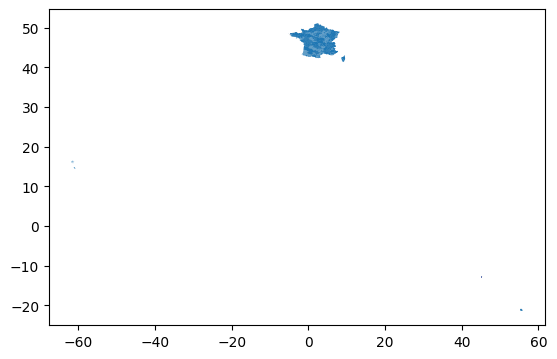

In [ ]:
data_filtered.plot()

In [ ]:
data_filtered

id_zone     code_zone type_zone  \
2        3237       94_2A_1       SUP   
3        3238       94_2A_2       SUP   
388      3623  31_59_000001       SUP   
389      3624  31_59_000002       SUP   
390      3625  31_59_000003       SUP   
...       ...           ...       ...   
8007    11935      44_51_11       SUP   
8008    11936      44_51_12       SUP   
8009    11937      44_51_13       SOU   
8010    11938      44_51_14       SOU   
8011    11939      44_51_15       SOU   

                                      nom_zone  n_version  est_max_v code_dep  \
2                                     Zone sud          1          1       2A   
3                                    Zone nord          1          1       2A   
388   Delta de l'Aa et Audomarois, partie Nord          1          1       59   
389                           Lys, partie Nord          1          1       59   
390                  Marque-Deûle, partie Nord          1          1       59   
...                                        ...        ...        ...      ...   
8007                            Seine Corridor          6          1       51   
8008                                  Surmelin          6          1       51   
8009                   Craie de Champagne Nord          5          1       51   
8010         Calcaires de Brie et de Champigny          5          1       51   
8011          Craie de Champagne Sud et Centre          5          1       51   

           nom_dep                                           geometry  
2     Corse-du-Sud  MULTIPOLYGON (((9.37283 41.55851, 9.37050 41.5...  
3     Corse-du-Sud  MULTIPOLYGON (((8.76369 41.92079, 8.76323 41.9...  
388           Nord  MULTIPOLYGON (((2.60768 50.93373, 2.60583 50.9...  
389           Nord  POLYGON ((2.36638 50.70968, 2.37034 50.71354, ...  
390           Nord  MULTIPOLYGON (((2.93792 50.72958, 2.94521 50.7...  
...            ...                                                ...  
8007         Marne  MULTIPOLYGON (((3.83433 48.51779, 3.83409 48.5...  
8008         Marne  POLYGON ((3.82929 48.89006, 3.82801 48.89142, ...  
8009         Marne  MULTIPOLYGON (((4.82621 48.82970, 4.82597 48.8...  
8010         Marne  MULTIPOLYGON (((3.62666 48.63715, 3.62875 48.6...  
8011         Marne  MULTIPOLYGON (((4.55302 48.60593, 4.55312 48.6...  

[2314 rows x 9 columns]

In [ ]:
data_filtered.to_file("data/active_zones.geojson")
data_filtered.to_file("data/active_zones.shp")

In [3]:
data_geo_simplify = gpd.read_file("data/active_zones_simplify.json")

In [4]:
arretes = pd.read_csv("data/arretes.csv")
arretes.head()

unique_key_arrete_zone_alerte  id_arrete  id_zone  \
0  bcd8a1761c228c406d8327a861707b3f      30911     7949   
1  8c59f0df20dcd5f9f356c60de3f263a4      30911     9837   
2  71c2bab98cd57d326325030c7e8ef747      32294     8138   
3  3485d7971eb4d1093ddcf7eba0f7319b      32294     8140   
4  951a957dd94201813c450dbf6f707c2a      32294     8141   

                                 numero_arrete numero_arrete_cadre  \
0  76_Z2_20220630_Vigilance_YeresEaulneBethune     76_20220720_ACS   
1  76_Z2_20220630_Vigilance_YeresEaulneBethune     76_20220720_ACS   
2                   LOT_AP_E-2022-359_20221229  LOT_APC_E-2018-131   
3                   LOT_AP_E-2022-359_20221229  LOT_APC_E-2018-131   
4                   LOT_AP_E-2022-359_20221229  LOT_APC_E-2018-131   

  date_signature debut_validite_arrete fin_validite_arrete  numero_niveau  \
0     2022-07-01            2022-07-01                 NaN              1   
1     2022-07-01            2022-07-01                 NaN              1   
2     2022-12-29            2023-01-01          2023-01-31              3   
3     2022-12-29            2023-01-01          2023-01-31              3   
4     2022-12-29            2023-01-01          2023-01-31              3   

  nom_niveau statut_arrete                                     chemin_fichier  
0  Vigilance        Publié  ArretesRestriction/76_Z2_20220630_Vigilance_Ye...  
1  Vigilance        Publié  ArretesRestriction/76_Z2_20220630_Vigilance_Ye...  
2     Alerte       Terminé  ArretesRestriction/AP_E_2022_359_interdiction_...  
3     Alerte       Terminé  ArretesRestriction/AP_E_2022_359_interdiction_...  
4     Alerte       Terminé  ArretesRestriction/AP_E_2022_359_interdiction_...

In [5]:
arretes_publie = arretes[arretes['statut_arrete'] == "Publié"]
arretes_publie.head()

unique_key_arrete_zone_alerte  id_arrete  id_zone  \
0   bcd8a1761c228c406d8327a861707b3f      30911     7949   
1   8c59f0df20dcd5f9f356c60de3f263a4      30911     9837   
69  df910139a346fb50400f6751e0f8c059      32311     9780   
70  132c600f65f8082f51a26bf706f6cdc4      32312     9784   
72  b18cbbffae3ad03200aa199a28ccafe5      32314     9779   

                                  numero_arrete  \
0   76_Z2_20220630_Vigilance_YeresEaulneBethune   
1   76_Z2_20220630_Vigilance_YeresEaulneBethune   
69                           DDTM/SEBIO/2023-15   
70                           DDTM/SEBIO/2023-16   
72                           DDTM/SEBIO/2023-11   

                           numero_arrete_cadre date_signature  \
0                              76_20220720_ACS     2022-07-01   
1                              76_20220720_ACS     2022-07-01   
69  ACD83_modificatif_12_aout_2022_modificatif     2023-02-17   
70  ACD83_modificatif_12_aout_2022_modificatif     2023-02-17   
72  ACD83_modificatif_12_aout_2022_modificatif     2023-02-17   

   debut_validite_arrete fin_validite_arrete  numero_niveau nom_niveau  \
0             2022-07-01                 NaN              1  Vigilance   
1             2022-07-01                 NaN              1  Vigilance   
69            2023-02-17          2023-10-15              3     Alerte   
70            2023-02-17          2023-10-15              3     Alerte   
72            2023-02-17          2023-10-15              1  Vigilance   

   statut_arrete                                     chemin_fichier  
0         Publié  ArretesRestriction/76_Z2_20220630_Vigilance_Ye...  
1         Publié  ArretesRestriction/76_Z2_20220630_Vigilance_Ye...  
69        Publié  ArretesRestriction/2023_02_17_Secheresse_Var_A...  
70        Publié  ArretesRestriction/2023_02_17_Secheresse_Var_A...  
72        Publié  ArretesRestriction/2023_02_17_AP_Secheresse_Vi...

In [6]:
geo_merge = data_geo_simplify.merge(arretes_publie, on = 'id_zone')

In [7]:
geo_merge.nom_niveau.unique()

array(['Vigilance', 'Alerte', 'Alerte renforcée', 'Crise'], dtype=object)

In [8]:
geo_merge.head()

id_zone     code_zone type_zone                                  nom_zone  \
0     3623  31_59_000001       SUP  Delta de l'Aa et Audomarois, partie Nord   
1     3624  31_59_000002       SUP                          Lys, partie Nord   
2     3625  31_59_000003       SUP                 Marque-Deûle, partie Nord   
3     3626  31_59_000004       SUP                                    Sambre   
4     3627  31_59_000005       SUP   Scarpe amont-Sensée-Escaut, partie Nord   

   n_version  est_max_v code_dep nom_dep  \
0          1          1       59    Nord   
1          1          1       59    Nord   
2          1          1       59    Nord   
3          1          1       59    Nord   
4          1          1       59    Nord   

                                            geometry  \
0  MULTIPOLYGON (((2.60768 50.93373, 2.61751 50.9...   
1  POLYGON ((2.37034 50.71354, 2.36638 50.70968, ...   
2  MULTIPOLYGON (((2.93792 50.72958, 2.94731 50.7...   
3  POLYGON ((3.58498 50.06947, 3.57650 50.07356, ...   
4  POLYGON ((3.00279 50.37089, 3.00959 50.36473, ...   

      unique_key_arrete_zone_alerte  id_arrete            numero_arrete  \
0  36c65fd4729c050a3baada65a20fc737      32430  AP-2023-04-14-vigilance   
1  d044fc5ede2b81145a32ec49f666ec8c      32430  AP-2023-04-14-vigilance   
2  00a17309b240a70f00f33c8bb2889e8d      32430  AP-2023-04-14-vigilance   
3  8edae77ad2b24ae6ec6c6e21f7f66292      32430  AP-2023-04-14-vigilance   
4  5e734fc1126b2dd6540b007f47ae5847      32430  AP-2023-04-14-vigilance   

   numero_arrete_cadre date_signature debut_validite_arrete  \
0  ACI 59/62_mars_2012     2023-04-14            2023-04-14   
1  ACI 59/62_mars_2012     2023-04-14            2023-04-14   
2  ACI 59/62_mars_2012     2023-04-14            2023-04-14   
3  ACI 59/62_mars_2012     2023-04-14            2023-04-14   
4  ACI 59/62_mars_2012     2023-04-14            2023-04-14   

  fin_validite_arrete  numero_niveau nom_niveau statut_arrete  \
0          2023-06-30              1  Vigilance        Publié   
1          2023-06-30              1  Vigilance        Publié   
2          2023-06-30              1  Vigilance        Publié   
3          2023-06-30              1  Vigilance        Publié   
4          2023-06-30              1  Vigilance        Publié   

                                      chemin_fichier  
0  ArretesRestriction/Arrêté vigilance sécheresse...  
1  ArretesRestriction/Arrêté vigilance sécheresse...  
2  ArretesRestriction/Arrêté vigilance sécheresse...  
3  ArretesRestriction/Arrêté vigilance sécheresse...  
4  ArretesRestriction/Arrêté vigilance sécheresse...

In [9]:
colonnes_selectionnees = ['id_zone','code_zone',	'type_zone'	,'nom_zone' ,'geometry', 'numero_niveau','nom_niveau','id_arrete','numero_arrete','numero_arrete_cadre',	'date_signature',	'debut_validite_arrete',	'fin_validite_arrete']
gdf_selection = geo_merge.loc[:, colonnes_selectionnees]
gdf_selection

id_zone     code_zone type_zone  \
0       3623  31_59_000001       SUP   
1       3624  31_59_000002       SUP   
2       3625  31_59_000003       SUP   
3       3626  31_59_000004       SUP   
4       3627  31_59_000005       SUP   
..       ...           ...       ...   
845    11873    27_89_0011       SUP   
846    11874    27_89_0012       SUP   
847    11875    27_89_0013       SUP   
848    11876    27_89_0014       SUP   
849    11877    27_89_0015       SUP   

                                     nom_zone  \
0    Delta de l'Aa et Audomarois, partie Nord   
1                            Lys, partie Nord   
2                   Marque-Deûle, partie Nord   
3                                      Sambre   
4     Scarpe amont-Sensée-Escaut, partie Nord   
..                                        ...   
845                        Bassin de l'Ouanne   
846                                     Seine   
847                Bassin de l' Aval Armançon   
848        Bassin des petits cours d'eau Nord   
849                           Bassin du Loing   

                                              geometry  numero_niveau  \
0    MULTIPOLYGON (((2.60768 50.93373, 2.61751 50.9...              1   
1    POLYGON ((2.37034 50.71354, 2.36638 50.70968, ...              1   
2    MULTIPOLYGON (((2.93792 50.72958, 2.94731 50.7...              1   
3    POLYGON ((3.58498 50.06947, 3.57650 50.07356, ...              1   
4    POLYGON ((3.00279 50.37089, 3.00959 50.36473, ...              1   
..                                                 ...            ...   
845  POLYGON ((3.02812 47.80065, 3.07629 47.65697, ...              3   
846  POLYGON ((3.25101 48.36510, 3.43936 48.31775, ...              1   
847  POLYGON ((3.57123 47.92631, 3.83992 47.88423, ...              1   
848  MULTIPOLYGON (((3.02974 48.28542, 3.15094 47.9...              4   
849  POLYGON ((3.01554 47.81376, 3.02193 47.81768, ...              3   

           nom_niveau  id_arrete            numero_arrete  \
0           Vigilance      32430  AP-2023-04-14-vigilance   
1           Vigilance      32430  AP-2023-04-14-vigilance   
2           Vigilance      32430  AP-2023-04-14-vigilance   
3           Vigilance      32430  AP-2023-04-14-vigilance   
4           Vigilance      32430  AP-2023-04-14-vigilance   
..                ...        ...                      ...   
845            Alerte      32675        DDT/SEE/2023/0031   
846         Vigilance      32675        DDT/SEE/2023/0031   
847         Vigilance      32675        DDT/SEE/2023/0031   
848  Alerte renforcée      32675        DDT/SEE/2023/0031   
849            Alerte      32675        DDT/SEE/2023/0031   

         numero_arrete_cadre date_signature debut_validite_arrete  \
0        ACI 59/62_mars_2012     2023-04-14            2023-04-14   
1        ACI 59/62_mars_2012     2023-04-14            2023-04-14   
2        ACI 59/62_mars_2012     2023-04-14            2023-04-14   
3        ACI 59/62_mars_2012     2023-04-14            2023-04-14   
4        ACI 59/62_mars_2012     2023-04-14            2023-04-14   
..                       ...            ...                   ...   
845  Yonne DDT/SEE/2021/0030     2023-06-15            2023-06-15   
846  Yonne DDT/SEE/2021/0030     2023-06-15            2023-06-15   
847  Yonne DDT/SEE/2021/0030     2023-06-15            2023-06-15   
848  Yonne DDT/SEE/2021/0030     2023-06-15            2023-06-15   
849  Yonne DDT/SEE/2021/0030     2023-06-15            2023-06-15   

    fin_validite_arrete  
0            2023-06-30  
1            2023-06-30  
2            2023-06-30  
3            2023-06-30  
4            2023-06-30  
..                  ...  
845          2023-12-31  
846          2023-12-31  
847          2023-12-31  
848          2023-12-31  
849          2023-12-31  

[850 rows x 13 columns]

In [10]:
type(gdf_selection.nom_niveau)

pandas.core.series.Series

In [11]:
gdf_selection = gdf_selection[~gdf_selection['geometry'].is_empty & gdf_selection['geometry'].notna()]


C:\Users\anael.delorme\AppData\Local\Temp\ipykernel_14316\2818137170.py:1: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  gdf_selection = gdf_selection[~gdf_selection['geometry'].is_empty & gdf_selection['geometry'].notna()]


In [12]:

colors = {'Vigilance': '#FAED93', 'Alerte': '#FAC939', 'Alerte renforcée': '#FA78C5', 'Crise': '#FA2048'}
cmap = ListedColormap([colors[level] for level in sorted(colors.keys())])





In [13]:
gdf_selection[gdf_selection['type_zone']=="SUP"].explore(column='nom_niveau', cmap = cmap, tooltip=True)

In [121]:
gdf_selection[gdf_selection['type_zone']=="SOU"].explore(column='nom_niveau', cmap=cmap, tooltip=True)

In [127]:
gdf_selection[gdf_selection['type_zone']=="SOU"].explore(column='nom_niveau', cmap=cmap, tooltip=True,  legend_kwds={'title': 'Titre de la légende'})